## Biomedical images

This lab aims for the students to become familiar with image manipulation and representation techniques such as histogram manipulation, or filters, convolutions and fourier transforms.

### Part 1

The first part of this script focuses on loading an image, manipulating its histogram, and showing it on screen.

To do so, we will need the following python libraries:

In [32]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import scipy.ndimage as ndimage

These are used for the following:
* `matplotlib.pyplot` offers reading, writting, and display options for images and plots. This will be useful to show the images on screen.
* `numpy` is the number one most used library on python for working with arrays, vectors, and numbers altogether, which we'll need to manipulate images.
* `cv2`, or `opencv-python`, is a huge library for image and video manipulation, which provides tons of filters and transformations easy to use.
* `scipy.ndimage` is also a library for image manipulation with filters, transformations and other tools.

An important consideration that must be taken into account when using `opencv-python` is that this library (for optimization reasons) displays colors in a BGR (Blue, Green, Red) form, in contrast with the RGB form most applications use nowadays.

Let us start by loading two images we'll use as examples for our code:

In [5]:
berkeley = plt.imread('image_examples/BerkeleyTower.png')
cameraman = plt.imread('image_examples/cameraman.tif')

These images will already be in RGB. We can show both images by running `matplotlib`'s `pyplot.imshow()`.

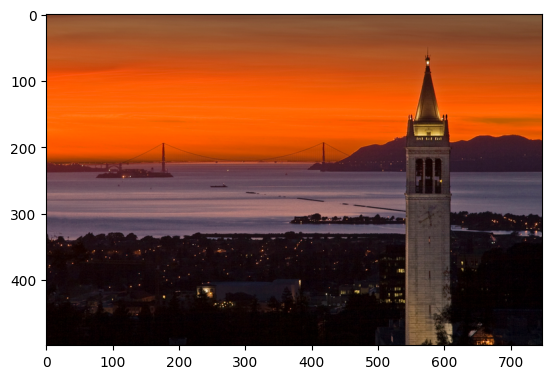

In [22]:
plt.imshow(berkeley)
plt.show()

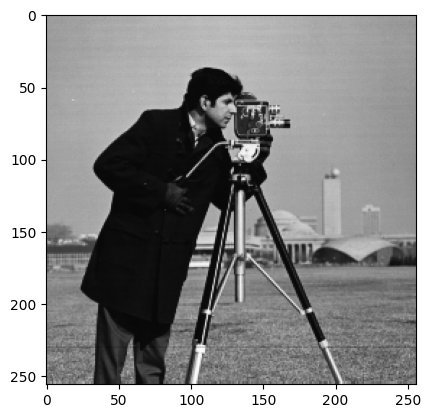

In [51]:
plt.imshow(cameraman, cmap='gray', vmin=0, vmax=255)
plt.show()

Note that the `cameraman.tif` image has a single channel, and as such needs a colormap (`cmap`) to be defined when showing it on screen. By default, all images with a single channel can be thought to be gray-scale images.

The `vmin` and `vmax` parameters determine which is the minimum and maximum values the pixels in the image can take.

To get a grasp of how images are encoded, we can split the channels of a colored image and display them side-by-side.

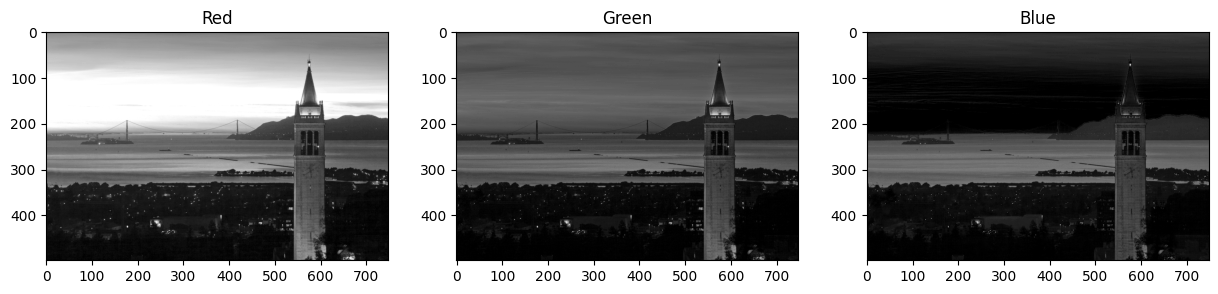

In [53]:
red = berkeley[:, :, 0]
green = berkeley[:, :, 1]
blue = berkeley[:, :, 2]

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(red, cmap='gray', vmin=0, vmax=1)
ax[0].set_title('Red')
ax[1].imshow(green, cmap='gray', vmin=0, vmax=1)
ax[1].set_title('Green')
ax[2].imshow(blue, cmap='gray', vmin=0, vmax=1)
ax[2].set_title('Blue')

plt.show()

Different colormaps may be used to convey the color information easier.

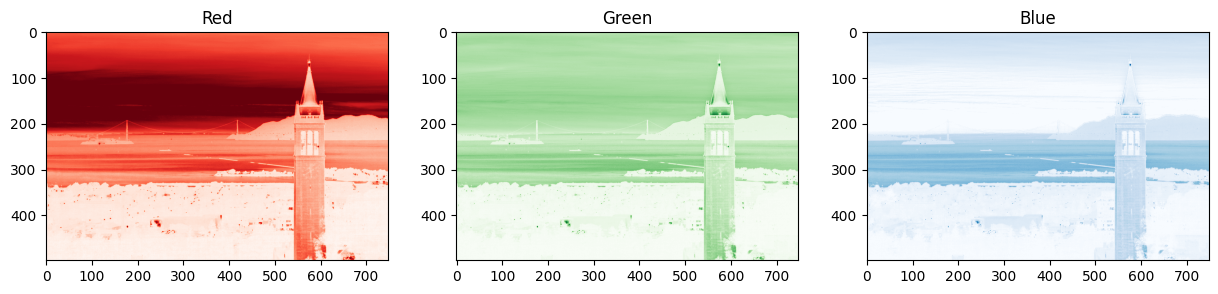

In [54]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(red, cmap='Reds', vmin=0, vmax=1)
ax[0].set_title('Red')
ax[1].imshow(green, cmap='Greens', vmin=0, vmax=1)
ax[1].set_title('Green')
ax[2].imshow(blue, cmap='Blues', vmin=0, vmax=1)
ax[2].set_title('Blue')

plt.show()

One can even convert colored images to gray-scale by different methods. The most easy is by averaging the intensity value over the color axis. This means performing the following calculation over all the pixels on the image:
$$
    GS_{ij} = \frac{1}{3}(R_{ij} + G_{ij} + B_{ij})
$$
Keep an eye on the shape of the image's matrix before and after the calculation.

Shape before: (499, 748, 3)
Shape after: (499, 748)


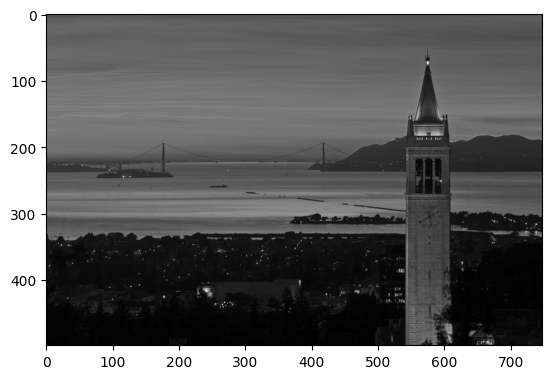

In [50]:
print("Shape before:", berkeley.shape)
gray = np.average(berkeley, axis=2)
print("Shape after:", gray.shape)

plt.imshow(gray, cmap='gray', vmin=0, vmax=1)
plt.show()

Note that different ways to make this conversion exist. For instance, the luminance of an image (also gray-scale) gives different importance to the three channels of the image:
$$
    L_{ij} = \frac{1}{3}(0.2126\cdot R_{ij} + 0.7152\cdot G_{ij} + 0.0722\cdot B_{ij})
$$

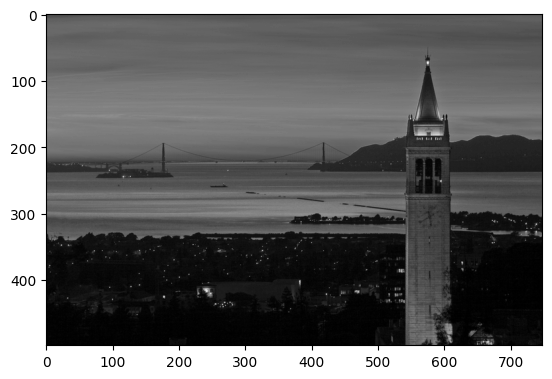

In [49]:
luminance = 0.2126 * red + 0.7152 * green + 0.0722 * blue

plt.imshow(luminance, cmap='gray', vmin=0, vmax=1)
plt.show()

`opencv` comes with some builtin functions that makes this step easier and more intuitive:

Shape before: (499, 748, 3)
Shape after: (499, 748)


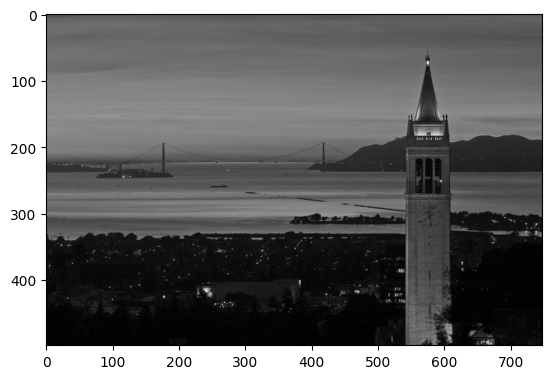

In [55]:
print("Shape before:", berkeley.shape)
gray = cv2.cvtColor(berkeley, cv2.COLOR_RGB2GRAY)
print("Shape after:", gray.shape)

plt.imshow(gray, cmap='gray', vmin=0, vmax=1)
plt.show()

The histogram of this image can be computed by running over all the pixels on the gray-scale image and counting how many times each of the values appear. This can be done with a single `scipy.ndimage` function:

In [56]:
hist = ndimage.histogram(gray, 0, 1, 256)

Which takes the following inputs:
* The `input` image for which to construct the histogram
* The `minimum` value of the image pixels
* The `maximum` value of the image pixels
* The `bin count`

Note that the image max and min values were set to 0 and 1, which must be done like this, because `opencv` also normalizes the image pixels to a floating point number between 0 and 1, which is a very common way of encoding images.

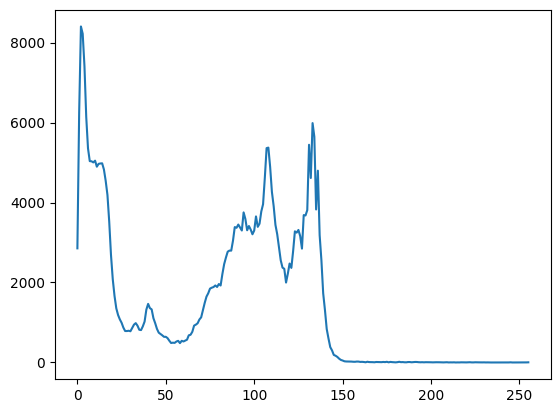

In [57]:
plt.plot(hist)
plt.show()

It becomes obvious in this histogram that the gray-scale image of berkeley tower has a larger ammount of dimmer colors rather than lighter colors. One type of histogram manipulation can be cathegorized under linear transformations, for instance, rescaling all of the image pixels (values from 0 to 1) to another range of values: 

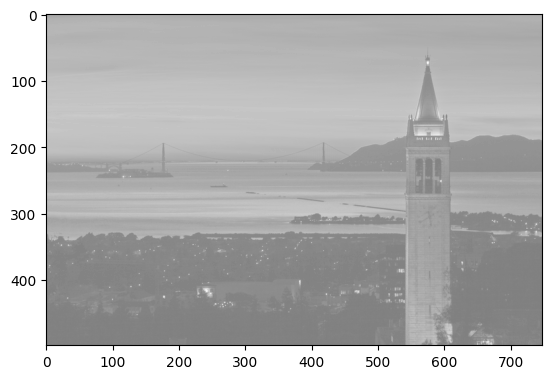

In [67]:
linear_eq = np.interp(gray, (gray.min(), gray.max()), (0.5, 1))

plt.imshow(linear_eq, cmap='gray', vmin=0, vmax=1)
plt.show()

See how the histogram changed:

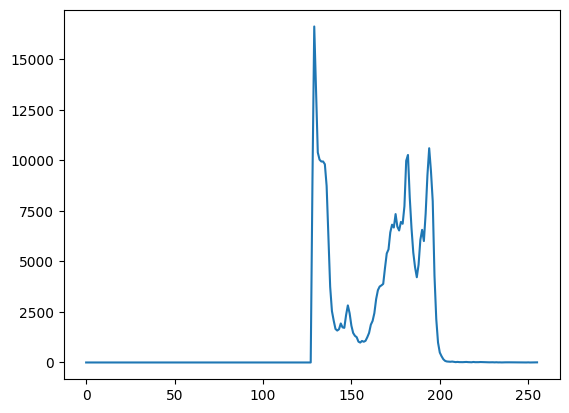

In [68]:
hist = ndimage.histogram(linear_eq, 0, 1, 256)

plt.plot(hist)
plt.show()

This is still not equalized, but one can play a bit with the numbers on the `np.interp` function, which provides an easy way of manipulating with linear transformations the histogram, to try to equalize it a bit.

Looking into the original histogram, most of the pixels present a value under 150 (over 255, which means a value of 150/255 = 0.58823529411 on the normalized image). We can then transform the image with the following:

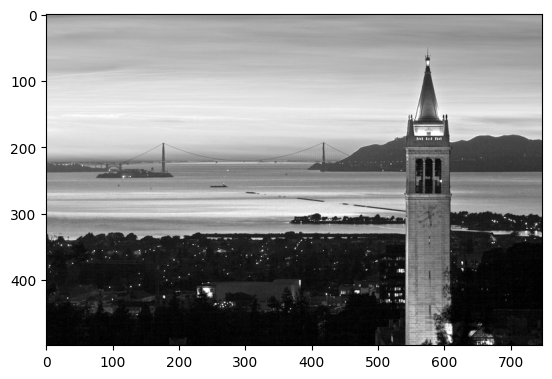

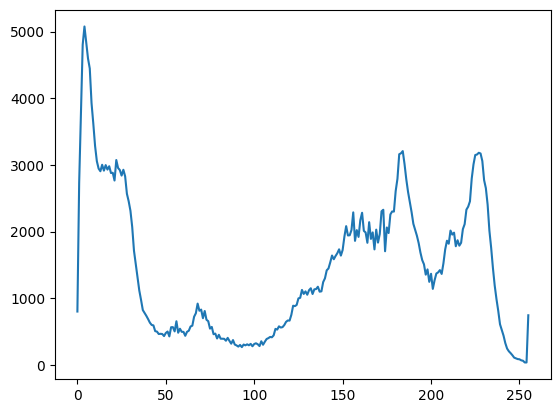

In [74]:
linear_eq = np.interp(gray, (0, 0.58823529411), (0, 1))

plt.imshow(linear_eq, cmap='gray', vmin=0, vmax=1)
plt.show()

hist = ndimage.histogram(linear_eq, 0, 1, 256)
plt.plot(hist)
plt.show()

This clearly improved the histogram of this image, however, it's not still equalized. This can be done with the following steps:

Note that, for the sake of simplicity, we go back to the `uint8` (0 to 255) values for the image pixels.

To start, one must compute the original histogram of the image:

In [76]:
grayUint8 = np.uint8(gray * 255)
hist = ndimage.histogram(grayUint8, 0, 255, 256)

Then one has to compute the cumulative sum of the histogram. This is equal to counting "how many pixels exist with a gray-scale value equal or lower to x":
$$
    cumsum(i) = \sum^i_{j=0} hist_j
$$

In [77]:
cumsum = np.cumsum(hist)

To compare, let us plot the histogram and cumsum back-to-back:

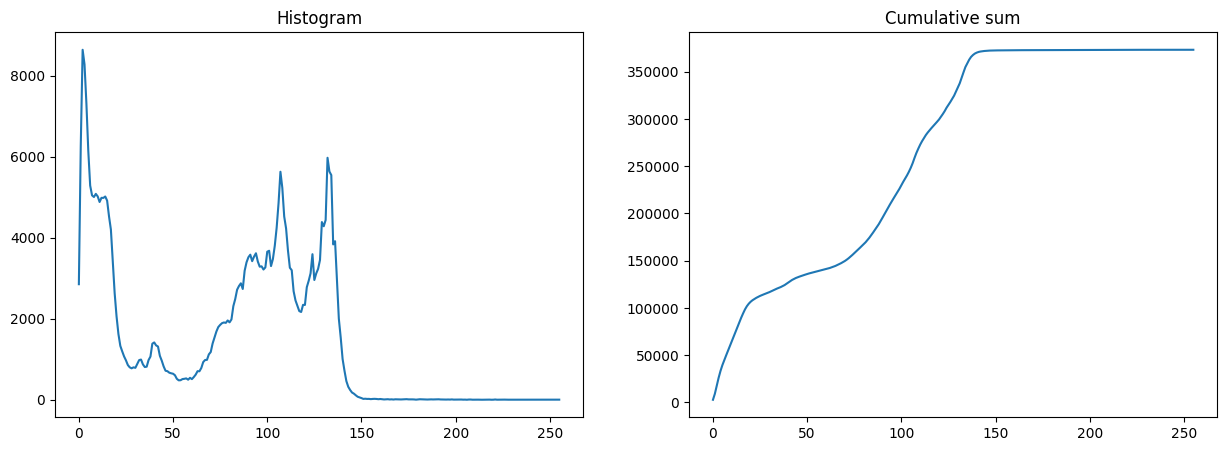

In [79]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].plot(hist)
ax[0].set_title('Histogram')
ax[1].plot(cumsum)
ax[1].set_title('Cumulative sum')

plt.show()

Finaly, the new value for the pixel $GS_{ij}$ will be set by normalizing the cumsum from 0 to 255, taking the old value of the pixel and running it through the cumsum function:
$$
    EQ_{ij} = \frac{1}{M} cumsum(GS_ij)
$$
Where M is the pixel count of the image:
$$
    M=shape_x \times shape_y
$$

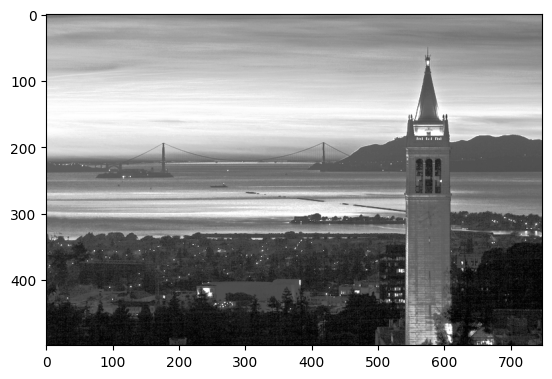

In [82]:
eq = cumsum[grayUint8] * 255 / grayUint8.size

plt.imshow(eq, cmap='gray', vmin=0, vmax=255)
plt.show()